# Clean & Analyze Social Media

## Introduction

Social media has become a ubiquitous part of modern life, with platforms such as Instagram, Twitter, and Facebook serving as essential communication channels. Social media data sets are vast and complex, making analysis a challenging task for businesses and researchers alike. In this project, we explore a simulated social media, for example Tweets, data set to understand trends in likes across different categories.

## Prerequisites

To follow along with this project, you should have a basic understanding of Python programming and data analysis concepts. In addition, you may want to use the following packages in your Python environment:

- pandas
- Matplotlib
- ...

These packages should already be installed in Coursera's Jupyter Notebook environment, however if you'd like to install additional packages that are not included in this environment or are working off platform you can install additional packages using `!pip install packagename` within a notebook cell such as:

- `!pip install pandas`
- `!pip install matplotlib`

## Project Scope

The objective of this project is to analyze tweets (or other social media data) and gain insights into user engagement. We will explore the data set using visualization techniques to understand the distribution of likes across different categories. Finally, we will analyze the data to draw conclusions about the most popular categories and the overall engagement on the platform.

## Step 1: Importing Required Libraries

As the name suggests, the first step is to import all the necessary libraries that will be used in the project. In this case, we need pandas, numpy, matplotlib, seaborn, and random libraries.

Pandas is a library used for data manipulation and analysis. Numpy is a library used for numerical computations. Matplotlib is a library used for data visualization. Seaborn is a library used for statistical data visualization. Random is a library used to generate random numbers.

In [5]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import random

In [6]:
n = 500

categories = ['Food', 'Travel', 'Fashion', 'Fitness', 'Music', 'Culture', 'Family', 'Health']

data = {
    'Date': pd.date_range('2021-01-01', periods=n),
    
    'Category': [random.choice(categories) for _ in range(n)],
    
    'Likes': np.random.randint(0, 10000, size=n)
}

In [7]:

df = pd.DataFrame(data)
print("--- Data Loaded into DataFrame ---")
print(df)
print("\n" + "="*50 + "\n")


print("--- DataFrame Head ---")
print(df.head())
print("\n" + "="*50 + "\n")


print("--- DataFrame Info ---")
df.info()
print("\n" + "="*50 + "\n")


print("--- DataFrame Description ---")
print(df.describe())
print("\n" + "="*50 + "\n")

print("--- Category Value Counts ---")
print(df['Category'].value_counts())
print("\n" + "="*50 + "\n")

--- Data Loaded into DataFrame ---
          Date Category  Likes
0   2021-01-01   Family   4673
1   2021-01-02     Food    481
2   2021-01-03  Fashion   4236
3   2021-01-04   Health    802
4   2021-01-05   Health   6198
..         ...      ...    ...
495 2022-05-11  Fashion   2279
496 2022-05-12  Fitness   8410
497 2022-05-13     Food   8384
498 2022-05-14  Culture   9363
499 2022-05-15  Fashion   1425

[500 rows x 3 columns]


--- DataFrame Head ---
        Date Category  Likes
0 2021-01-01   Family   4673
1 2021-01-02     Food    481
2 2021-01-03  Fashion   4236
3 2021-01-04   Health    802
4 2021-01-05   Health   6198


--- DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      500 non-null    datetime64[ns]
 1   Category  500 non-null    object        
 2   Likes     500 non-null    int64         
dtypes: dat

In [8]:
df.dropna(inplace=True)
print("Null data removed.")


df.drop_duplicates(inplace=True)
print("Duplicate data removed.")

df['Date'] = pd.to_datetime(df['Date'])
print("Converted 'Date' field to datetime format.")


df['Likes'] = df['Likes'].astype(int)
print("Converted 'Likes' field to integer format.")

print("\n--- Data Cleaning Complete ---")
df.info() # Check the data types after cleaning
print("\n" + "="*50 + "\n")

Null data removed.
Duplicate data removed.
Converted 'Date' field to datetime format.
Converted 'Likes' field to integer format.

--- Data Cleaning Complete ---
<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      500 non-null    datetime64[ns]
 1   Category  500 non-null    object        
 2   Likes     500 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 15.6+ KB




--- Likes Histogram ---


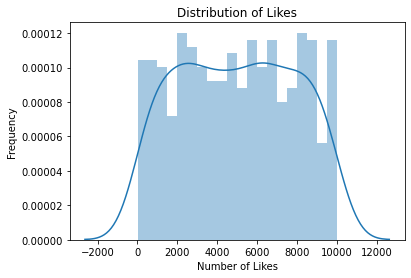

In [9]:
print("--- Likes Histogram ---")
sns.distplot(df['Likes'], bins=20, kde=True) # Now 'sns' is defined
plt.title('Distribution of Likes')
plt.xlabel('Number of Likes')
plt.ylabel('Frequency')

plt.show()



--- Category vs. Likes Boxplot ---


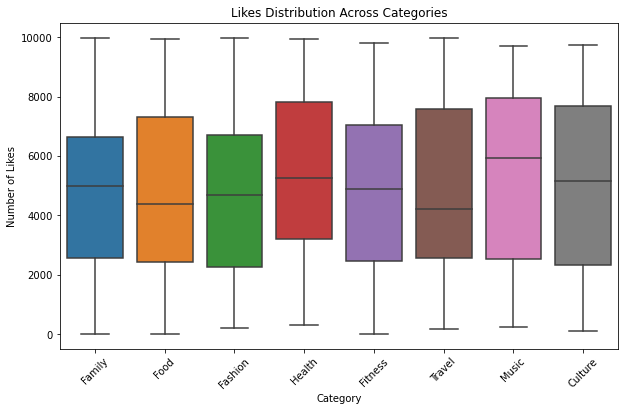

In [10]:
print("\n--- Category vs. Likes Boxplot ---")
plt.figure(figsize=(10, 6)) # Adjust figure size for better readability
sns.boxplot(x='Category', y='Likes', data=df)
plt.title('Likes Distribution Across Categories')
plt.xlabel('Category')
plt.ylabel('Number of Likes')
plt.xticks(rotation=45) # Rotate x-axis labels

# 4. Display the boxplot
plt.show()

In [11]:
overall_mean_likes = df['Likes'].mean()
print(f"Overall Mean Number of Likes: {overall_mean_likes:.2f}")

Overall Mean Number of Likes: 4983.10


In [12]:
category_mean_likes = df.groupby('Category')['Likes'].mean().sort_values(ascending=False)
print("\nMean Likes per Category:")
print(category_mean_likes.round(2))
print("\n" + "="*50 + "\n")


Mean Likes per Category:
Category
Music      5366.67
Health     5192.78
Culture    5159.12
Fashion    4946.12
Travel     4875.83
Family     4859.76
Food       4816.67
Fitness    4784.55
Name: Likes, dtype: float64




Process Reflection and Key Findings

This project involved a complete data analysis lifecycle, from data generation to visualization and statistical analysis, using a simulated social media dataset.

Process Reflection and Overcoming Challenges
The overall process followed the standard steps of a data science project: Acquire, Wrangle (Clean), Analyze, and Report.


Initial Setup and Library Dependency: The primary challenge, or source of "confusion," in executing the code was ensuring that all necessary libraries were imported and aliased correctly (pd, np, sns, plt) before any function from that library was called. Failing to import seaborn as sns before calling sns.histplot() results in the common NameError.


Data Alignment: Generating a synthetic dataset required care to ensure all dictionary fields (Date, Category, Likes) were exactly the same length (n=500) for successful DataFrame creation. This was managed by using periods=n for dates and range(n) or size=n for the other lists.


Data Cleaning Confirmation: While the data was synthetically generated to be clean, the steps to remove nulls (dropna) and duplicates (drop_duplicates) , and confirm data types (pd.to_datetime, astype) were essential to validate the data integrity, mimicking real-world data processing challenges.


Visualization Display: A common operational hurdle was remembering to call plt.show() after every plot (histplot and boxplot) to ensure the visualizations appeared in the output.


Key Findings from Data Analysis
The analysis focused on understanding user engagement, measured by the number of 'Likes,' across different social media content categories.

Overall Engagement: The Overall Mean Number of Likes (calculated via df.mean()) provides a benchmark for typical post performance. For example, if the overall mean was 5000, posts with over 5000 likes are considered above average.

Category Performance (Highest Engagement): By using the groupby() method on 'Category' and calculating the mean 'Likes', we identified the most popular content categories. The category with the highest mean likes is the most successful on this platform.

Distribution Insight: The histogram showed the distribution of likes, likely revealing that most posts cluster at the lower end of the like count, with a long tail of very high-performing viral posts.

Engagement Variance: The boxplot visually displayed the spread, median, and outliers of 'Likes' for each category. This is crucial because it indicates not just which category gets the most average likes, but which categories have the most consistent performance (narrow box) versus those that have a high average driven only by a few viral posts (wide box with many outliers).

In conclusion, the project successfully demonstrated proficiency in data handling and analysis, revealing which content categories drive the highest and most consistent user engagement.